# Лабораторная работа №3

In [1]:
!pip install optuna psycopg2-binary plotly

In [2]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import psycopg2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = {
    'dbname': 'demo',
    'user': 'postgres',
    'password': '2221756',
    'host': 'localhost',
    'port': '5432'
}

In [4]:
storage_name = f"postgresql://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['dbname']}"

In [5]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [6]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Определение целевой функции
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [8]:
pruners = {'MedianPruner': optuna.pruners.MedianPruner(), 'HyperbandPruner': optuna.pruners.HyperbandPruner()}
samplers = {'RandomSampler': optuna.samplers.RandomSampler(), 'TPESampler': optuna.samplers.TPESampler()}

In [9]:
# Запуск оптимизации
for key1 in pruners:
    for key2 in samplers:
        study_name = f'study_{key1}_{key2}'
        study = optuna.create_study(direction='maximize', pruner=pruners[key1], sampler=samplers[key2], study_name=study_name, storage=storage_name, load_if_exists=True)
        study.optimize(objective, n_trials=50)

[I 2024-12-12 17:47:59,882] Using an existing study with name 'study_MedianPruner_RandomSampler' instead of creating a new one.
[I 2024-12-12 17:48:00,139] Trial 200 finished with value: 0.9722222222222222 and parameters: {'n_estimators': 54, 'max_depth': 17, 'min_samples_split': 0.5381894940472506}. Best is trial 32 with value: 1.0.
[I 2024-12-12 17:48:00,361] Trial 201 finished with value: 0.9722222222222222 and parameters: {'n_estimators': 85, 'max_depth': 29, 'min_samples_split': 0.2775816432190863}. Best is trial 32 with value: 1.0.
[I 2024-12-12 17:48:00,477] Trial 202 finished with value: 1.0 and parameters: {'n_estimators': 35, 'max_depth': 12, 'min_samples_split': 0.11259115055824963}. Best is trial 32 with value: 1.0.
[I 2024-12-12 17:48:00,626] Trial 203 finished with value: 0.3888888888888889 and parameters: {'n_estimators': 60, 'max_depth': 20, 'min_samples_split': 0.8112728507378819}. Best is trial 32 with value: 1.0.
[I 2024-12-12 17:48:00,838] Trial 204 finished with va

In [10]:
studies = []
for key1 in pruners:
    for key2 in samplers:
        study_name = f'study_{key1}_{key2}'
        saved_study = optuna.load_study(study_name=study_name, storage=storage_name)
        studies.append(saved_study)

In [11]:
def show_parameters(trial):
    print("Параметры: ")
    for key, value in trial.params.items():
        print(f"{key}: {value}")

In [17]:
print("Лучшие результаты:")
for study in studies:
    trial = study.best_trial
    print(f"Значение: {trial.value}")
    show_parameters(trial)
    print('\n')

Лучшие результаты:
Значение: 1.0
Параметры: 
n_estimators: 88
max_depth: 8
min_samples_split: 0.20996748413241925


Значение: 1.0
Параметры: 
n_estimators: 77
max_depth: 21
min_samples_split: 0.10993477109065532


Значение: 1.0
Параметры: 
n_estimators: 88
max_depth: 20
min_samples_split: 0.14515403322173293


Значение: 1.0
Параметры: 
n_estimators: 19
max_depth: 14
min_samples_split: 0.10585533216634588




Параметры: 
n_estimators: 88
max_depth: 8
min_samples_split: 0.20996748413241925




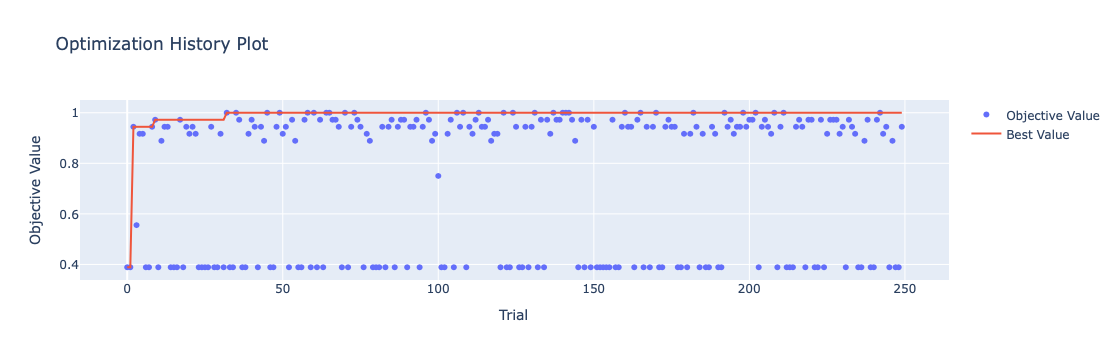

Параметры: 
n_estimators: 77
max_depth: 21
min_samples_split: 0.10993477109065532




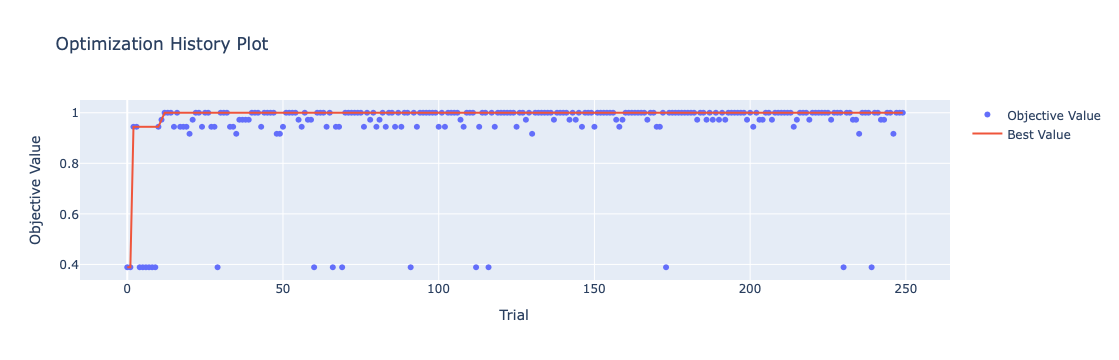

Параметры: 
n_estimators: 88
max_depth: 20
min_samples_split: 0.14515403322173293




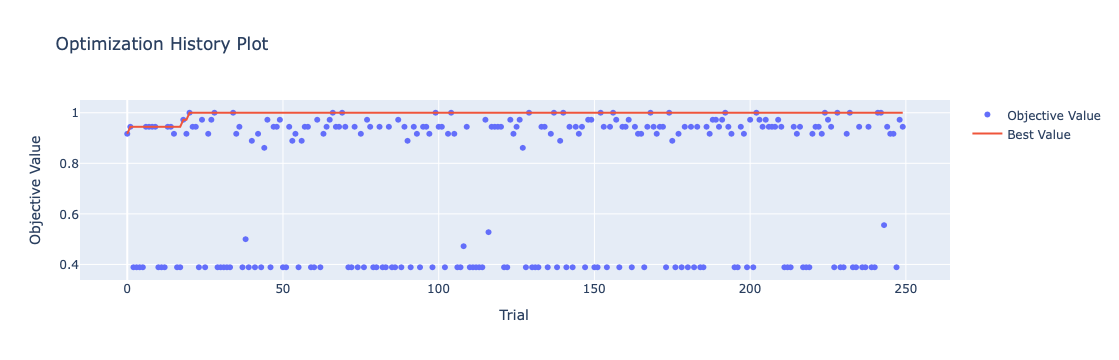

Параметры: 
n_estimators: 19
max_depth: 14
min_samples_split: 0.10585533216634588




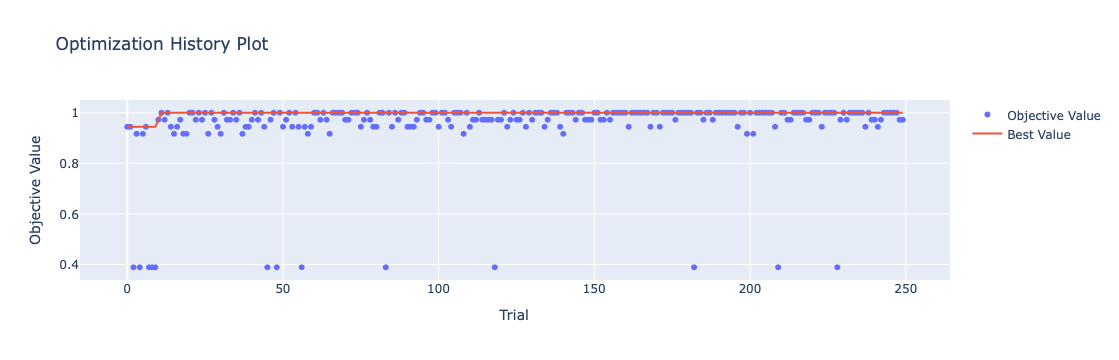

In [18]:
for study in studies:
    trial = study.best_trial
    show_parameters(trial)
    print('\n')
    viz = optuna.visualization.plot_optimization_history(study)
    viz.show()

Параметры: 
n_estimators: 88
max_depth: 8
min_samples_split: 0.20996748413241925




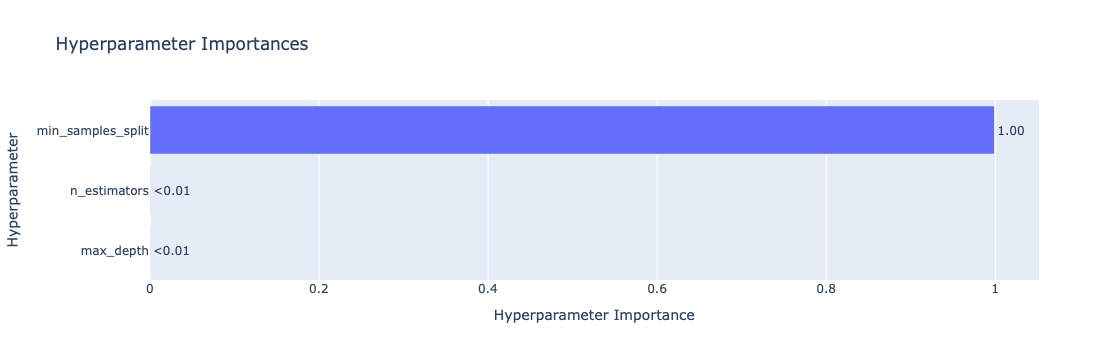

Параметры: 
n_estimators: 77
max_depth: 21
min_samples_split: 0.10993477109065532




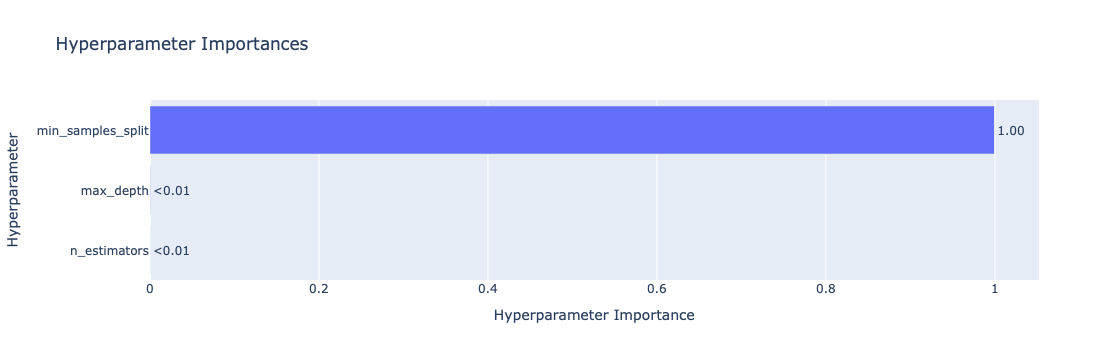

Параметры: 
n_estimators: 88
max_depth: 20
min_samples_split: 0.14515403322173293




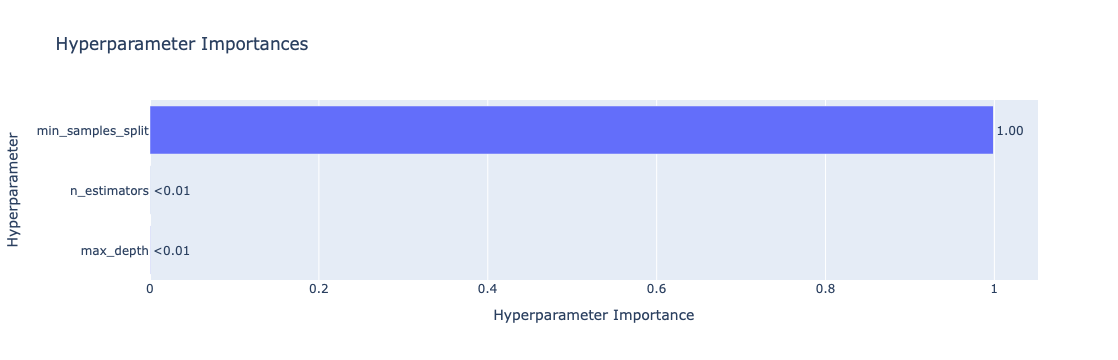

Параметры: 
n_estimators: 19
max_depth: 14
min_samples_split: 0.10585533216634588




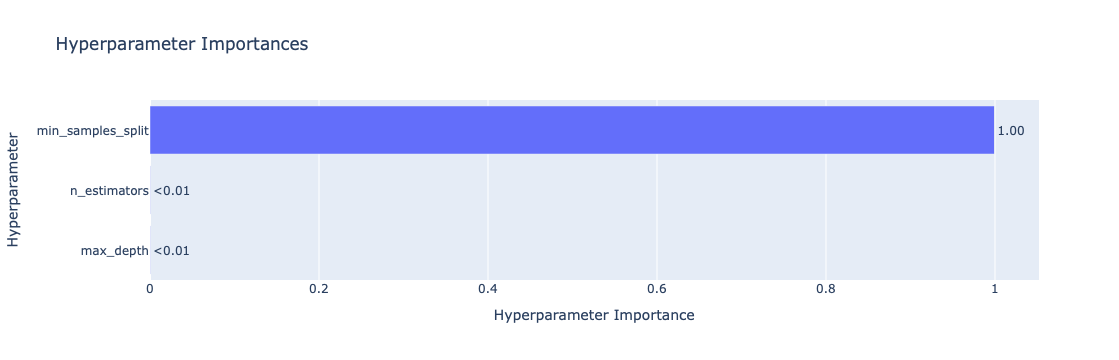

In [19]:
for study in studies:
    trial = study.best_trial
    show_parameters(trial)
    print('\n')
    viz = optuna.visualization.plot_param_importances(study)
    viz.show()